In [1]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('C:\\Users\Windows\_ANCONDA WORKSHOP\_VAMSHI SIR\datasets\petrol_consumption.csv')

In [4]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


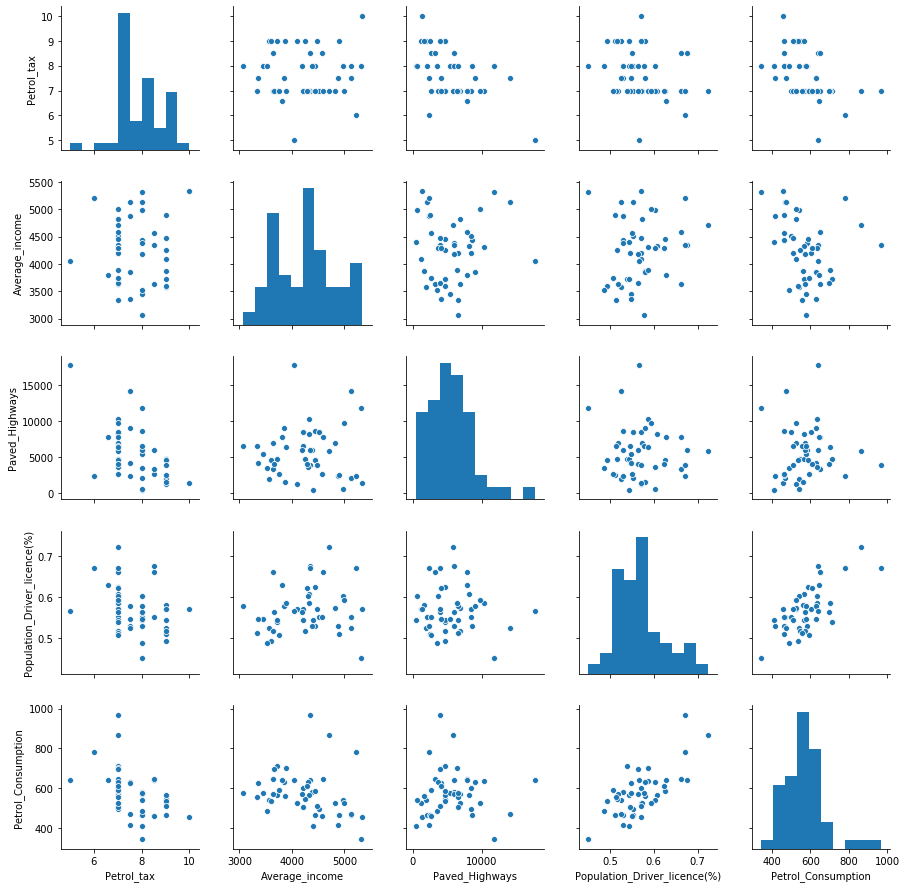

In [7]:
sns.pairplot(df)

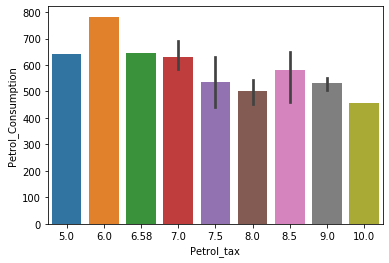

In [9]:
sns.barplot(x='Petrol_tax',y='Petrol_Consumption',data=df)

In [26]:
df.Petrol_tax.value_counts()

7.00     19
8.00     10
9.00      8
7.50      4
8.50      3
6.58      1
6.00      1
5.00      1
10.00     1
Name: Petrol_tax, dtype: int64

In [28]:
df[df['Petrol_tax']==7.50]['Petrol_Consumption'].max()

631

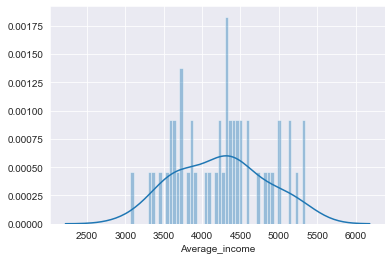

In [14]:
sns.set_style('darkgrid')
sns.distplot(df['Average_income'],bins=50)

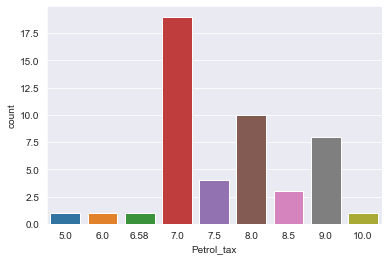

In [15]:
sns.countplot(df['Petrol_tax'])
#it can be seen that in most of the states petrol tax is nearly 7

In [29]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


In [33]:
x=df.drop('Petrol_Consumption',axis=1)
y=df.Petrol_Consumption

In [146]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [147]:
from sklearn.tree import DecisionTreeRegressor

In [148]:
dt=DecisionTreeRegressor(min_samples_split=4)
dt.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [149]:
pred=dt.predict(xtest)
from sklearn.metrics import *

In [150]:
print('MAE',mean_absolute_error(pred,ytest))
print('MSE',mean_squared_error(pred,ytest))
print('RMSE',np.sqrt(mean_squared_error(pred,ytest)))

MAE 64.43333333333334
MSE 5894.044444444446
RMSE 76.77268032604076


### we are getting fluctuations in results because the size of dataset is very less

In [153]:
pd.DataFrame({'actual':ytest,'predicted':pred})

,actual,predicted
24,460,504.000000
42,632,585.500000
30,571,550.500000
35,644,537.000000
37,704,537.000000
1,524,585.500000
33,628,687.000000
36,640,623.000000
43,591,537.500000
18,865,796.666667


now try removing a less important feature and then try to predict

In [156]:
dff=df

In [157]:
dff.drop('Paved_Highways',axis=1,inplace=True)

In [168]:
x=dff.drop('Petrol_Consumption',axis=1)
y=dff.Petrol_Consumption
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [169]:
dt=DecisionTreeRegressor(min_samples_split=4)
dt.fit(xtrain,ytrain)
pred=dt.predict(xtest)
from sklearn.metrics import *

In [170]:
print('MAE',mean_absolute_error(pred,ytest))
print('MSE',mean_squared_error(pred,ytest))
print('RMSE',np.sqrt(mean_squared_error(pred,ytest)))

MAE 42.09999999999999
MSE 2681.388888888888
RMSE 51.78212904940167


### still we are getting fluctuations in results because the size of dataset is very less